In [6]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [7]:
y_train = pd.read_csv(r'C:\Projects_ciência_dados\DIABETES\data\processed\y_train_sem_Fasting_Blood_Glucose.csv')

In [3]:
y_train.columns

Index(['Diabetes'], dtype='object')

In [8]:
y_test = pd.read_csv(r'C:\Projects_ciência_dados\DIABETES\data\processed\y_test_sem_Fasting_Blood_Glucose.csv')

In [9]:
x_train = pd.read_csv(r'C:\Projects_ciência_dados\DIABETES\data\processed\x_train_sem_Fasting_Blood_Glucose.csv')

In [10]:
x_test = pd.read_csv(r'C:\Projects_ciência_dados\DIABETES\data\processed\x_test_sem_Fasting_Blood_Glucose.csv')

In [7]:
x_train

,onehot__Sex_Female,onehot__Sex_Male,onehot__Ethnicity_Asian,onehot__Ethnicity_Black,onehot__Ethnicity_Hispanic,onehot__Ethnicity_White,onehot__Physical_Activity_Level_High,onehot__Physical_Activity_Level_Low,onehot__Physical_Activity_Level_Moderate,onehot__Alcohol_Consumption_Heavy,...,scaler__Blood_Pressure_Systolic,scaler__Blood_Pressure_Diastolic,scaler__Cholesterol_Total,scaler__Cholesterol_HDL,scaler__Cholesterol_LDL,scaler__GGT,scaler__Serum_Urate,scaler__Dietary_Intake_Calories,scaler__Family_History_of_Diabetes,scaler__Previous_Gestational_Diabetes
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-0.198051,0.604274,1.177843,-0.706220,-1.068551,0.333800,0.136893,0.490099,0.989917,0.963853
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.685005,-0.032495,0.176666,1.032038,1.171279,1.379244,-0.274857,1.329937,0.989917,0.963853
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.427802,0.893715,-1.676330,0.977073,-1.276783,-1.598923,1.029020,-1.048441,-1.010185,-1.037503
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.608145,-0.379823,-1.431286,-0.561938,-0.342408,0.900886,0.480019,-1.703822,-1.010185,0.963853
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.263105,-1.595472,-0.864186,-0.946691,1.440913,-1.471618,1.509396,1.099366,0.989917,0.963853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.531286,-0.379823,1.257190,1.011426,1.585074,-1.074272,-0.480733,-0.313407,0.989917,-1.037503
7496,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.889786,1.646260,-1.011212,0.166344,-0.833622,0.121624,-0.343482,-1.105734,-1.010185,0.963853
7497,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.504662,-0.785039,1.653927,-0.974173,-0.943077,-0.889101,-0.412108,0.744426,-1.010185,0.963853
7498,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-1.350943,0.777938,0.104319,1.382438,-1.501033,-0.626775,-0.617983,1.651340,0.989917,0.963853


In [8]:
np.unique(y_test["Diabetes"], return_counts=True)

(array([0, 1]), array([1412, 1088]))

In [9]:
type(x_train)

pandas.core.frame.DataFrame

In [10]:
x_train.columns

Index(['onehot__Sex_Female', 'onehot__Sex_Male', 'onehot__Ethnicity_Asian',
       'onehot__Ethnicity_Black', 'onehot__Ethnicity_Hispanic',
       'onehot__Ethnicity_White', 'onehot__Physical_Activity_Level_High',
       'onehot__Physical_Activity_Level_Low',
       'onehot__Physical_Activity_Level_Moderate',
       'onehot__Alcohol_Consumption_Heavy',
       'onehot__Alcohol_Consumption_Moderate',
       'onehot__Smoking_Status_Current', 'onehot__Smoking_Status_Former',
       'onehot__Smoking_Status_Never', 'scaler__Age', 'scaler__BMI',
       'scaler__Waist_Circumference', 'scaler__Fasting_Blood_Glucose',
       'scaler__Blood_Pressure_Systolic', 'scaler__Blood_Pressure_Diastolic',
       'scaler__Cholesterol_Total', 'scaler__Cholesterol_HDL',
       'scaler__Cholesterol_LDL', 'scaler__GGT', 'scaler__Serum_Urate',
       'scaler__Dietary_Intake_Calories', 'scaler__Family_History_of_Diabetes',
       'scaler__Previous_Gestational_Diabetes'],
      dtype='object')

#### Bernoulli

In [11]:
from sklearn.naive_bayes import BernoulliNB

In [12]:
bernoulli = BernoulliNB()
bernoulli.fit(x_train, y_train)
previsao_bernoulli = bernoulli.predict(x_test)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
acuracia_bernoulli = accuracy_score(previsao_bernoulli, y_test)
print(f"Acurácia bernoulli: {acuracia_bernoulli}")

Acurácia bernoulli: 0.8392


In [14]:
print(classification_report(y_test,previsao_bernoulli))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1412
           1       0.78      0.88      0.83      1088

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.85      0.84      0.84      2500



In [15]:
print(confusion_matrix(y_test,previsao_bernoulli))

[[1141  271]
 [ 131  957]]


#### Árvores

In [16]:
parametros = {
    "max_depth":[500, 600, 650],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,5,10],
    "criterion":["gini", "entropy"]
}

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
randomized = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_distributions=parametros, verbose=True, n_jobs=4, cv=3, n_iter=20)
randomized.fit(x_train,y_train)
melhores_parametros = randomized.best_params_
melhor_resultado = randomized.best_score_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [20]:
print(melhor_resultado)

0.8064


In [21]:
print(melhores_parametros)

{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 500, 'criterion': 'gini'}


In [22]:
arbol = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=650, criterion='gini')
arbol.fit(x_train, y_train)
previsao_arbol = arbol.predict(x_test)

In [23]:
cross_arbol1 = cross_val_score(arbol,x_train,y_train, cv=5)
print(cross_arbol1.mean())

0.7945333333333334


In [24]:
print(accuracy_score(y_test,previsao_arbol))

0.8056


In [25]:
print(classification_report(y_test,previsao_arbol))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1412
           1       0.79      0.76      0.77      1088

    accuracy                           0.81      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.81      0.81      0.81      2500



In [26]:
print(confusion_matrix(y_test,previsao_arbol))

[[1185  227]
 [ 259  829]]


#### Profundidade da árvore

In [27]:
arbol.get_depth()

42

#### Numero de folhas

In [28]:
arbol.get_n_leaves()

np.int64(754)

In [29]:
arbol.tree_

In [30]:
importances = pd.DataFrame({
    "features":x_train.columns,
    "importancia":arbol.feature_importances_
}).sort_values(by="importancia", ascending=False)

In [31]:
importances.head() # Maior fator de diabetes é o índice glicêmico em jejum

,features,importancia
17,scaler__Fasting_Blood_Glucose,0.619530
22,scaler__Cholesterol_LDL,0.036695
23,scaler__GGT,0.036626
15,scaler__BMI,0.035203
16,scaler__Waist_Circumference,0.034060


#### Regressão logística

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
parametros = {
    'C':[1.0,2.0,3.0,4.0],
    'penalty':['l2','elasticnet', 'None'],
    'tol':[0.001, 0.0001, 0.00001]
}

In [34]:
randomized_regression = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=parametros, n_jobs=4, verbose=True)
randomized_regression.fit(x_train, y_train)
melhores_parametros = randomized_regression.best_params_
melhor_resultado = randomized_regression.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Projects_ciência_dados\DIABETES\.venv\Lib\sit

In [35]:
print(melhor_resultado)

0.7934666666666668


In [36]:
print(melhores_parametros)

{'tol': 0.001, 'penalty': 'l2', 'C': 2.0}


In [37]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)
previsao_logistic = logistic.predict(x_test)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(accuracy_score(previsao_logistic,y_test))

0.7992


In [39]:
print(classification_report(y_test,previsao_logistic))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1412
           1       0.77      0.76      0.77      1088

    accuracy                           0.80      2500
   macro avg       0.80      0.79      0.80      2500
weighted avg       0.80      0.80      0.80      2500



In [40]:
cross_logistic = cross_val_score(logistic, x_train, y_train, cv=5)
cross_logistic.mean()

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

np.float64(0.7932)

In [41]:
print(confusion_matrix(previsao_logistic,y_test))

[[1171  261]
 [ 241  827]]


#### Random

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
from scipy.stats import randint

In [44]:
parametros = {
    "n_estimators": randint(100,301), # no randint coloca o maior e menor
    "min_samples_split": randint(10,30),
    "min_samples_leaf": randint(10,30),
    "max_features": ['log2','sqrt'],
    "max_depth": randint(10,20)
}

In [45]:
randomized_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parametros, n_jobs=4, verbose=True)
randomized_random.fit(x_train,y_train)
melhores_parametros = randomized_random.best_params_
melhor_resultado = randomized_random.best_score_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
print(melhor_resultado)

0.8713333333333333


In [47]:
print(melhores_parametros)

{'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 24, 'min_samples_split': 28, 'n_estimators': 180}


In [21]:
random = RandomForestClassifier(verbose=True, n_jobs=4)
random.fit(x_train,y_train)
previsao_random = random.predict(x_test)
previsao_ingenua_random = random.predict(x_train)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [22]:
print(accuracy_score(previsao_random,y_test))

0.88


In [23]:
print(classification_report(y_test,previsao_random))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1412
           1       0.79      1.00      0.88      1088

    accuracy                           0.88      2500
   macro avg       0.89      0.89      0.88      2500
weighted avg       0.90      0.88      0.88      2500



In [24]:
print(confusion_matrix(previsao_random,y_test))

[[1116    4]
 [ 296 1084]]


In [52]:
print(accuracy_score(previsao_ingenua_random,y_train))

1.0


In [53]:
cross_random = cross_val_score(random, x_train,y_train,cv=5)
print(f"Cross random: {cross_random.mean()}")

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(

Cross random: 0.8705333333333334


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [54]:
print(random.max_depth)

None


#### Número de árvores

In [55]:
print(random.n_estimators)

100


#### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
previsao_KNN = KNN.predict(x_test)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
print(accuracy_score(previsao_KNN,y_test))

0.7544


In [58]:
print(classification_report(y_test,previsao_KNN))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1412
           1       0.71      0.73      0.72      1088

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.76      0.75      0.75      2500



In [59]:
print(confusion_matrix(previsao_KNN,y_test))

[[1090  292]
 [ 322  796]]


##### SVM

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [61]:
parametros = {
    "C":[1,2,4,5,6],
    "kernel":['poly','rbf','sigmoid','linear']
}

In [62]:
randomized_SVM = RandomizedSearchCV(estimator=SVC(), param_distributions=parametros, n_jobs=4, verbose=True)
randomized_SVM.fit(x_train,y_train)
melhores_parametros = randomized_SVM.best_params_
melhor_resultado = randomized_SVM.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
print(melhor_resultado)

0.8324


In [64]:
print(melhores_parametros)

{'kernel': 'rbf', 'C': 1}


In [65]:
SVM = SVC()
SVM.fit(x_train,y_train)
previsao_SVM = SVM.predict(x_test)
previsao_ingenua = SVM.predict(x_train)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print(accuracy_score(previsao_ingenua,y_train))

0.8757333333333334


In [67]:
print(classification_report(y_test, previsao_SVM))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1412
           1       0.78      0.91      0.84      1088

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.86      0.85      0.85      2500



In [68]:
print(confusion_matrix(previsao_SVM,y_test))

[[1126   97]
 [ 286  991]]


In [69]:
cross_SVM = cross_val_score(SVM,x_train,y_train,cv=5)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

In [70]:
print(cross_SVM.mean())

0.8324


In [71]:
print(accuracy_score(previsao_SVM,y_test))

0.8468


##### xgboost

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [74]:
randomized_xg = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=xgb_params, n_jobs=4, verbose=True)
randomized_xg.fit(x_train,y_train)
melhores_parametros = randomized_xg.best_params_
melhor_resultado = randomized_xg.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [75]:
print(melhor_resultado)

0.8706666666666667


In [76]:
print(melhores_parametros)

{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [77]:
XG = XGBClassifier(n_estimator = 200, min_child_weight=1, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree = 0.8, subsample = 1.0)
XG.fit(x_train,y_train)
cross_xg = cross_val_score(XG,x_train,y_train,cv=5)
previsao_XG = XG.predict(x_test)
previsao_ingenua = XG.predict(x_train)

c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projects_ciência_dados\DIABETES\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_esti

In [78]:
print(accuracy_score(previsao_ingenua,y_train)) 

0.9993333333333333


In [79]:
print(cross_xg.mean())

0.8610666666666666


In [80]:
print(accuracy_score(previsao_XG,y_test))

0.8736


In [81]:
print(classification_report(y_test, previsao_XG))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1412
           1       0.79      0.97      0.87      1088

    accuracy                           0.87      2500
   macro avg       0.88      0.89      0.87      2500
weighted avg       0.89      0.87      0.87      2500



In [82]:
print(confusion_matrix(previsao_XG,y_test))

[[1124   28]
 [ 288 1060]]


In [83]:
resultados_arvore = []
resultados_random = []
resultados_logistic = []
resultados_SVM = []
resultados_xg = []
resultados_bernoulli = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    arvore = DecisionTreeClassifier(min_samples_split= 5, min_samples_leaf= 10, max_depth= 500, criterion= 'gini')
    scores = cross_val_score(arvore, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_arvore.append(scores.mean())
    
    random = RandomForestClassifier(max_depth= 11, max_features= 'sqrt', min_samples_leaf= 22, min_samples_split= 29, n_estimators= 166)
    scores = cross_val_score(random, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_random.append(scores.mean())
    
    logistic = LogisticRegression(tol= 0.001, penalty= 'l2', C= 3.0)
    scores = cross_val_score(logistic, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_logistic.append(scores.mean())
    
    SVM = SVC(kernel= 'rbf', C= 4)
    scores = cross_val_score(SVM, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_SVM.append(scores.mean())
    
    xg = XGBClassifier(n_estimator = 200, min_child_weight=1, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree = 0.8, subsample = 1.0)
    scores = cross_val_score(xg, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_xg.append(scores.mean())
    
    bernoulli = BernoulliNB()
    scores = cross_val_score(bernoulli, x_train, y_train, cv=kfold, n_jobs=4)
    resultados_bernoulli.append(scores.mean())
    


In [84]:
resultados = pd.DataFrame({
    'arvores': resultados_arvore,
    'random_forest': resultados_random,
    'logistic': resultados_logistic,
    'SVM': resultados_SVM,
    'XGBoost': resultados_xg,
    'Bernoulli': resultados_bernoulli
    
})

In [85]:
resultados

,arvores,random_forest,logistic,SVM,XGBoost,Bernoulli
0,0.811067,0.871333,0.795600,0.822000,0.861333,0.828133
1,0.801733,0.871333,0.793467,0.822267,0.861600,0.828133
2,0.809333,0.871333,0.794533,0.820400,0.862667,0.828133
3,0.801067,0.871333,0.794000,0.823200,0.861067,0.828133
4,0.806533,0.871333,0.795467,0.819067,0.861200,0.828133
5,0.810267,0.871333,0.793867,0.818933,0.862400,0.828133
6,0.806800,0.871200,0.794533,0.820000,0.861600,0.828133
7,0.807733,0.871333,0.793333,0.816800,0.859067,0.828133
8,0.808800,0.871333,0.794400,0.822000,0.861733,0.828133
9,0.806400,0.871333,0.792000,0.816133,0.859333,0.828133


Random Forest apresentou a melhor média e Bernoulli o melhor desvio padrão

In [86]:
resultados.describe()

,arvores,random_forest,logistic,SVM,XGBoost,Bernoulli
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,0.808058,0.871320,0.794080,0.819604,0.861396,8.281333e-01
std,0.003150,0.000041,0.000901,0.002001,0.001301,9.887242e-17
min,0.801067,0.871200,0.792000,0.815333,0.859067,8.281333e-01
25%,0.806433,0.871333,0.793333,0.818733,0.860533,8.281333e-01
50%,0.807600,0.871333,0.794000,0.819867,0.861467,8.281333e-01
75%,0.810167,0.871333,0.794533,0.820400,0.862333,8.281333e-01
max,0.814267,0.871333,0.795600,0.823200,0.863733,8.281333e-01


Variância

In [87]:
resultados.var()

arvores          9.922064e-06
random_forest    1.655172e-09
logistic         8.123831e-07
SVM              4.004884e-06
XGBoost          1.692853e-06
Bernoulli        9.775755e-33
dtype: float64

##### Coeficiente de variação

Bernoulli e Random Forest foram os mais estáveis

In [88]:
(resultados.std() / resultados.mean()) * 100 

arvores          3.898150e-01
random_forest    4.669216e-03
logistic         1.135053e-01
SVM              2.441691e-01
XGBoost          1.510452e-01
Bernoulli        1.193919e-14
dtype: float64

 Só pode fazer o teste de hipóteses com dados que seguem a distribuição normal, portanto é necessário avaliar o resultado dos algoritimos antes de de fazer o teste

Teste de normalidade

In [89]:
alpha = 0.05

In [90]:
from scipy.stats import shapiro

 Se o resultado de pvalue for maior que 0.05, está em uma distribuição normal

In [91]:
shapiro(resultados_arvore), shapiro(resultados_bernoulli), shapiro(resultados_logistic), shapiro(resultados_random), shapiro(resultados_SVM), shapiro(resultados_xg)

(ShapiroResult(statistic=np.float64(0.9817857529496159), pvalue=np.float64(0.8707894705561161)),
 ShapiroResult(statistic=np.float64(0.5257864360943001), pvalue=np.float64(1.0146374023214968e-08)),
 ShapiroResult(statistic=np.float64(0.9567035195539862), pvalue=np.float64(0.2545515686376446)),
 ShapiroResult(statistic=np.float64(0.34671047671870603), pvalue=np.float64(1.783285256593218e-10)),
 ShapiroResult(statistic=np.float64(0.9672019474838738), pvalue=np.float64(0.46572282713095065)),
 ShapiroResult(statistic=np.float64(0.9646472761107507), pvalue=np.float64(0.40473194763308495)))

In [92]:
import seaborn as sns

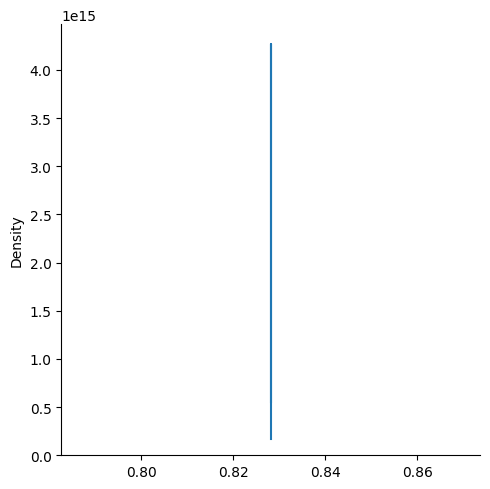

In [93]:
sns.displot(resultados_bernoulli, kind='kde') # Não é normal

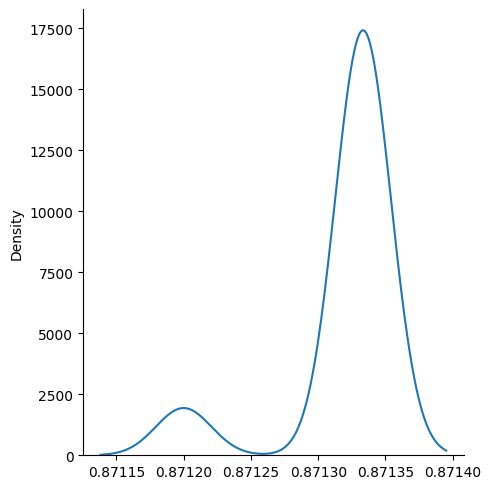

In [94]:
sns.displot(resultados_random, kind='kde') # Não é majoritarimente normal, mas pode ser usado no Anova

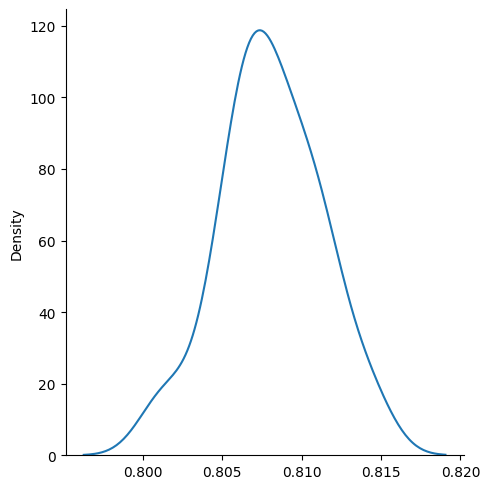

In [95]:
sns.displot(resultados_arvore, kind='kde')

In [96]:
resultados.columns

Index(['arvores', 'random_forest', 'logistic', 'SVM', 'XGBoost', 'Bernoulli'], dtype='object')

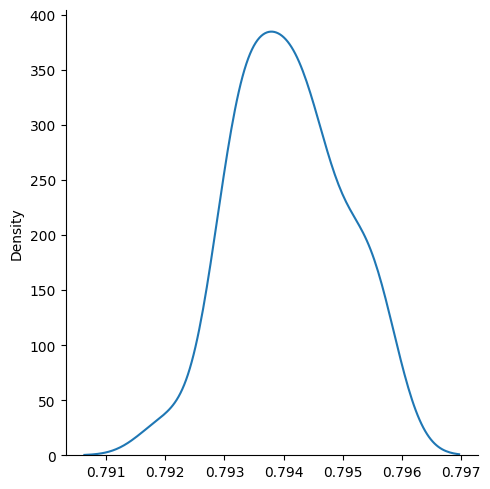

In [97]:
sns.displot(resultados_logistic, kind="kde")

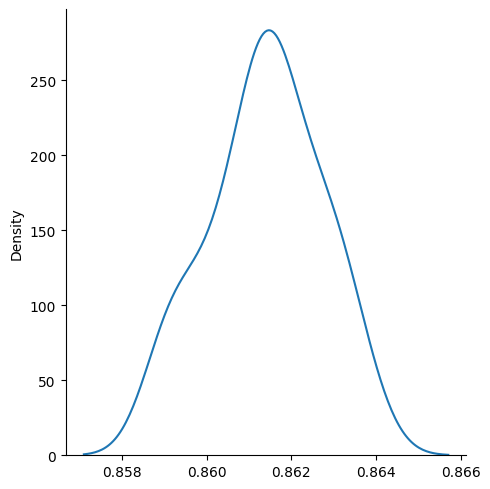

In [98]:
sns.displot(resultados_xg, kind='kde')

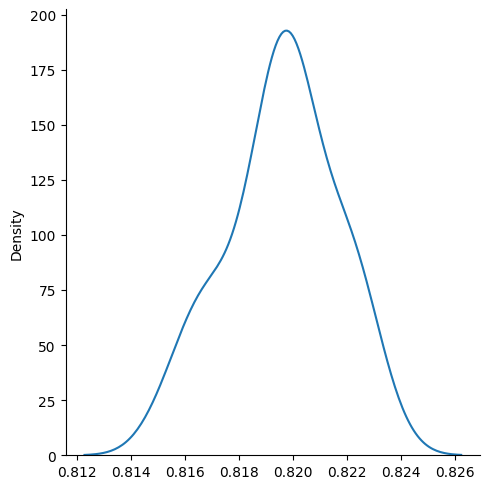

In [99]:
sns.displot(resultados_SVM, kind="kde")

Teste de hipóteses com Anova

In [100]:
from scipy.stats import f_oneway

In [101]:
_, p = f_oneway(resultados_random, resultados_arvore, resultados_logistic, resultados_SVM, resultados_xg) # Menos o Bernoulli
p

np.float64(3.114101830971359e-177)

In [102]:
alpha = 0.05
if p <= alpha:
    print("H0 rejeitado. Existe diferença estatística entre os valores")
else:
    print("Hipótese rejeitada. Não existe diferença estatística") # Se isso fosse verdadeira, não faria diferença usar qualquer um dos algoritmos

H0 rejeitado. Existe diferença estatística entre os valores


In [103]:
algoritmos_nomes = ['random', 'arvore', 'logistic', 'SVM', 'xg']
algoritmos_resultados = [resultados_random, resultados_arvore, resultados_logistic, resultados_SVM, resultados_xg]

In [104]:
resultados_algoritmos = {
    "accuracy": np.concatenate(algoritmos_resultados),
    "algoritmo": np.repeat(algoritmos_nomes, [len(arr) for arr in algoritmos_resultados])
}

In [105]:
resultados_algoritmos

{'accuracy': array([0.87133333, 0.87133333, 0.87133333, 0.87133333, 0.87133333,
        0.87133333, 0.8712    , 0.87133333, 0.87133333, 0.87133333,
        0.87133333, 0.87133333, 0.87133333, 0.8712    , 0.87133333,
        0.87133333, 0.87133333, 0.87133333, 0.87133333, 0.87133333,
        0.87133333, 0.8712    , 0.87133333, 0.87133333, 0.87133333,
        0.87133333, 0.87133333, 0.87133333, 0.87133333, 0.87133333,
        0.81106667, 0.80173333, 0.80933333, 0.80106667, 0.80653333,
        0.81026667, 0.8068    , 0.80773333, 0.8088    , 0.8064    ,
        0.81133333, 0.80653333, 0.80986667, 0.80866667, 0.8112    ,
        0.814     , 0.80706667, 0.80933333, 0.81426667, 0.80853333,
        0.80746667, 0.81186667, 0.8056    , 0.80426667, 0.8052    ,
        0.80706667, 0.8048    , 0.80746667, 0.8116    , 0.80586667,
        0.7956    , 0.79346667, 0.79453333, 0.794     , 0.79546667,
        0.79386667, 0.79453333, 0.79333333, 0.7944    , 0.792     ,
        0.79306667, 0.7932    , 0.79

In [106]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.871333,random
1,0.871333,random
2,0.871333,random
3,0.871333,random
4,0.871333,random
...,...,...
145,0.860933,xg
146,0.862933,xg
147,0.861733,xg
148,0.860133,xg


In [107]:
resultados_df.head(61)

,accuracy,algoritmo
0,0.871333,random
1,0.871333,random
2,0.871333,random
3,0.871333,random
4,0.871333,random
...,...,...
56,0.804800,arvore
57,0.807467,arvore
58,0.811600,arvore
59,0.805867,arvore


Tukey para comparação detalhada entre os resultados dos modelos

In [108]:
order = resultados_df.groupby("algoritmo")["accuracy"].mean().sort_values().index
resultados_df["algoritmo"] = pd.Categorical(resultados_df["algoritmo"], categories=order, ordered=True)

In [109]:
from statsmodels.stats.multicomp import MultiComparison

In [110]:
compara_algoritmos = MultiComparison(resultados_df["accuracy"], resultados_df["algoritmo"])

In [111]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
     SVM   arvore  -0.0115   0.0 -0.0128 -0.0103   True
     SVM logistic  -0.0255   0.0 -0.0268 -0.0242   True
     SVM   random   0.0517   0.0  0.0504   0.053   True
     SVM       xg   0.0418   0.0  0.0405  0.0431   True
  arvore logistic   -0.014   0.0 -0.0153 -0.0127   True
  arvore   random   0.0633   0.0   0.062  0.0646   True
  arvore       xg   0.0533   0.0   0.052  0.0546   True
logistic   random   0.0772   0.0  0.0759  0.0785   True
logistic       xg   0.0673   0.0   0.066  0.0686   True
  random       xg  -0.0099   0.0 -0.0112 -0.0086   True
-------------------------------------------------------


Avaliação com dados de teste

In [1]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [3]:
from sklearn.metrics import confusion_matrix

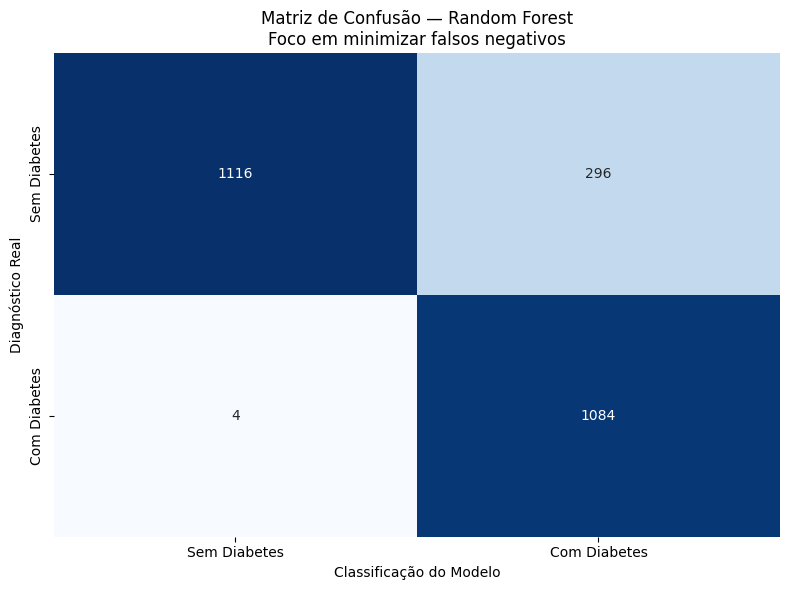

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, previsao_random)

plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Sem Diabetes', 'Com Diabetes'],
    yticklabels=['Sem Diabetes', 'Com Diabetes']
)



plt.title(
    'Matriz de Confusão — Random Forest\n'
    'Foco em minimizar falsos negativos',
    fontsize=12
)

plt.xlabel('Classificação do Modelo')
plt.ylabel('Diagnóstico Real')

plt.tight_layout()
plt.show()
